<h1>Balbir Singh</h1>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

(x_train, y_train), (x_test, y_test) = tf.keras. \
                                datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28*28).astype('float32')/255
x_test = x_test.reshape(10000, 28*28).astype('float32')/255

In [3]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
rfc.score(x_test, y_test)

0.9713

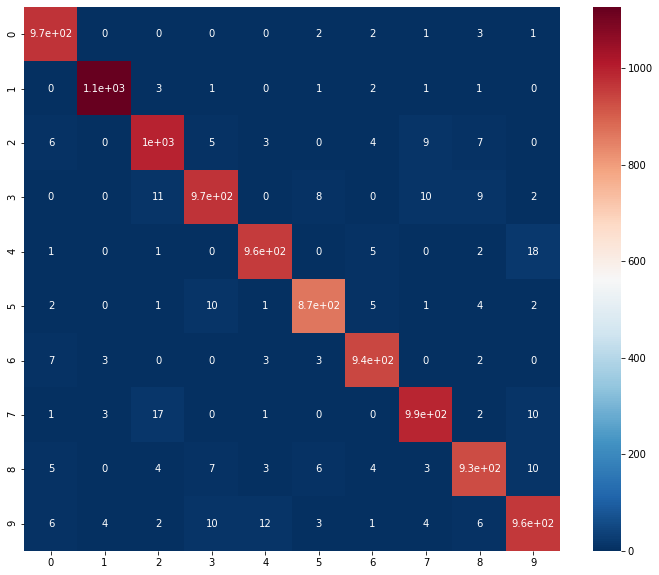

In [4]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(10),range(10))
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, cmap='RdBu_r')

In [ ]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(4.257267, 1.006989, '0'),
  Text(-3.4987812, 1.6498373, '1'),
  Text(0.057074055, 1.1695191, '2'),
  Text(0.6061751, 1.784388, '3'),
  Text(-0.258784, -2.306481, '4'),
  Text(0.29041803, 0.67587173, '5'),
  Text(0.5154381, 0.10370049, '6'),
  Text(-0.8939849, -2.4334145, '7'),
  Text(-0.41391635, 1.3982358, '8'),
  Text(-0.7446102, -2.2165842, '9')])

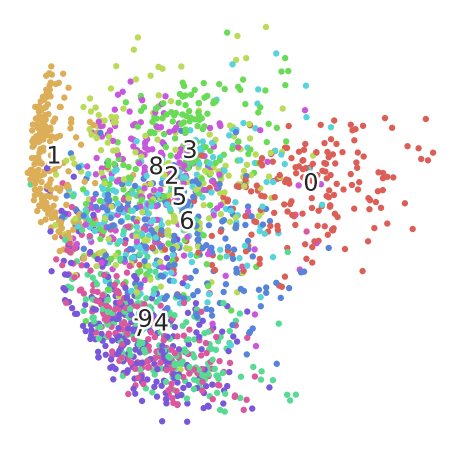

In [7]:
x_subset = x_train[0:2000]
y_subset = y_train[0:2000]

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output


(<Figure size 576x576 with 1 Axes>,
 [Text(-34.124187, -49.610023, '0'),
  Text(20.413307, 1.0099683, '1'),
  Text(15.313957, -19.14484, '2'),
  Text(-7.3382134, -25.996067, '3'),
  Text(6.2260504, 47.055046, '4'),
  Text(-21.748062, -3.2905474, '5'),
  Text(-48.73524, -3.6256514, '6'),
  Text(34.67077, 34.978867, '7'),
  Text(24.288622, -24.897964, '8'),
  Text(9.994795, 35.240772, '9')])

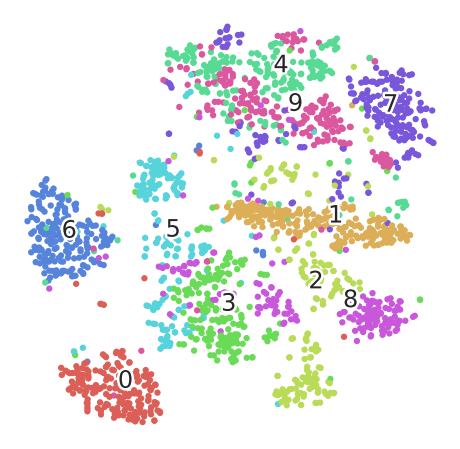

In [8]:
from sklearn.manifold import TSNE
fashion_tsne = TSNE(random_state=2).fit_transform(x_subset)
fashion_scatter(fashion_tsne, y_subset)

Comment: performs better than MLFFNN with 100 trees.